In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch

In [25]:
#Load the dataset
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [26]:
df.drop(columns=['ID#'],inplace=True)

In [5]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [27]:
#Scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

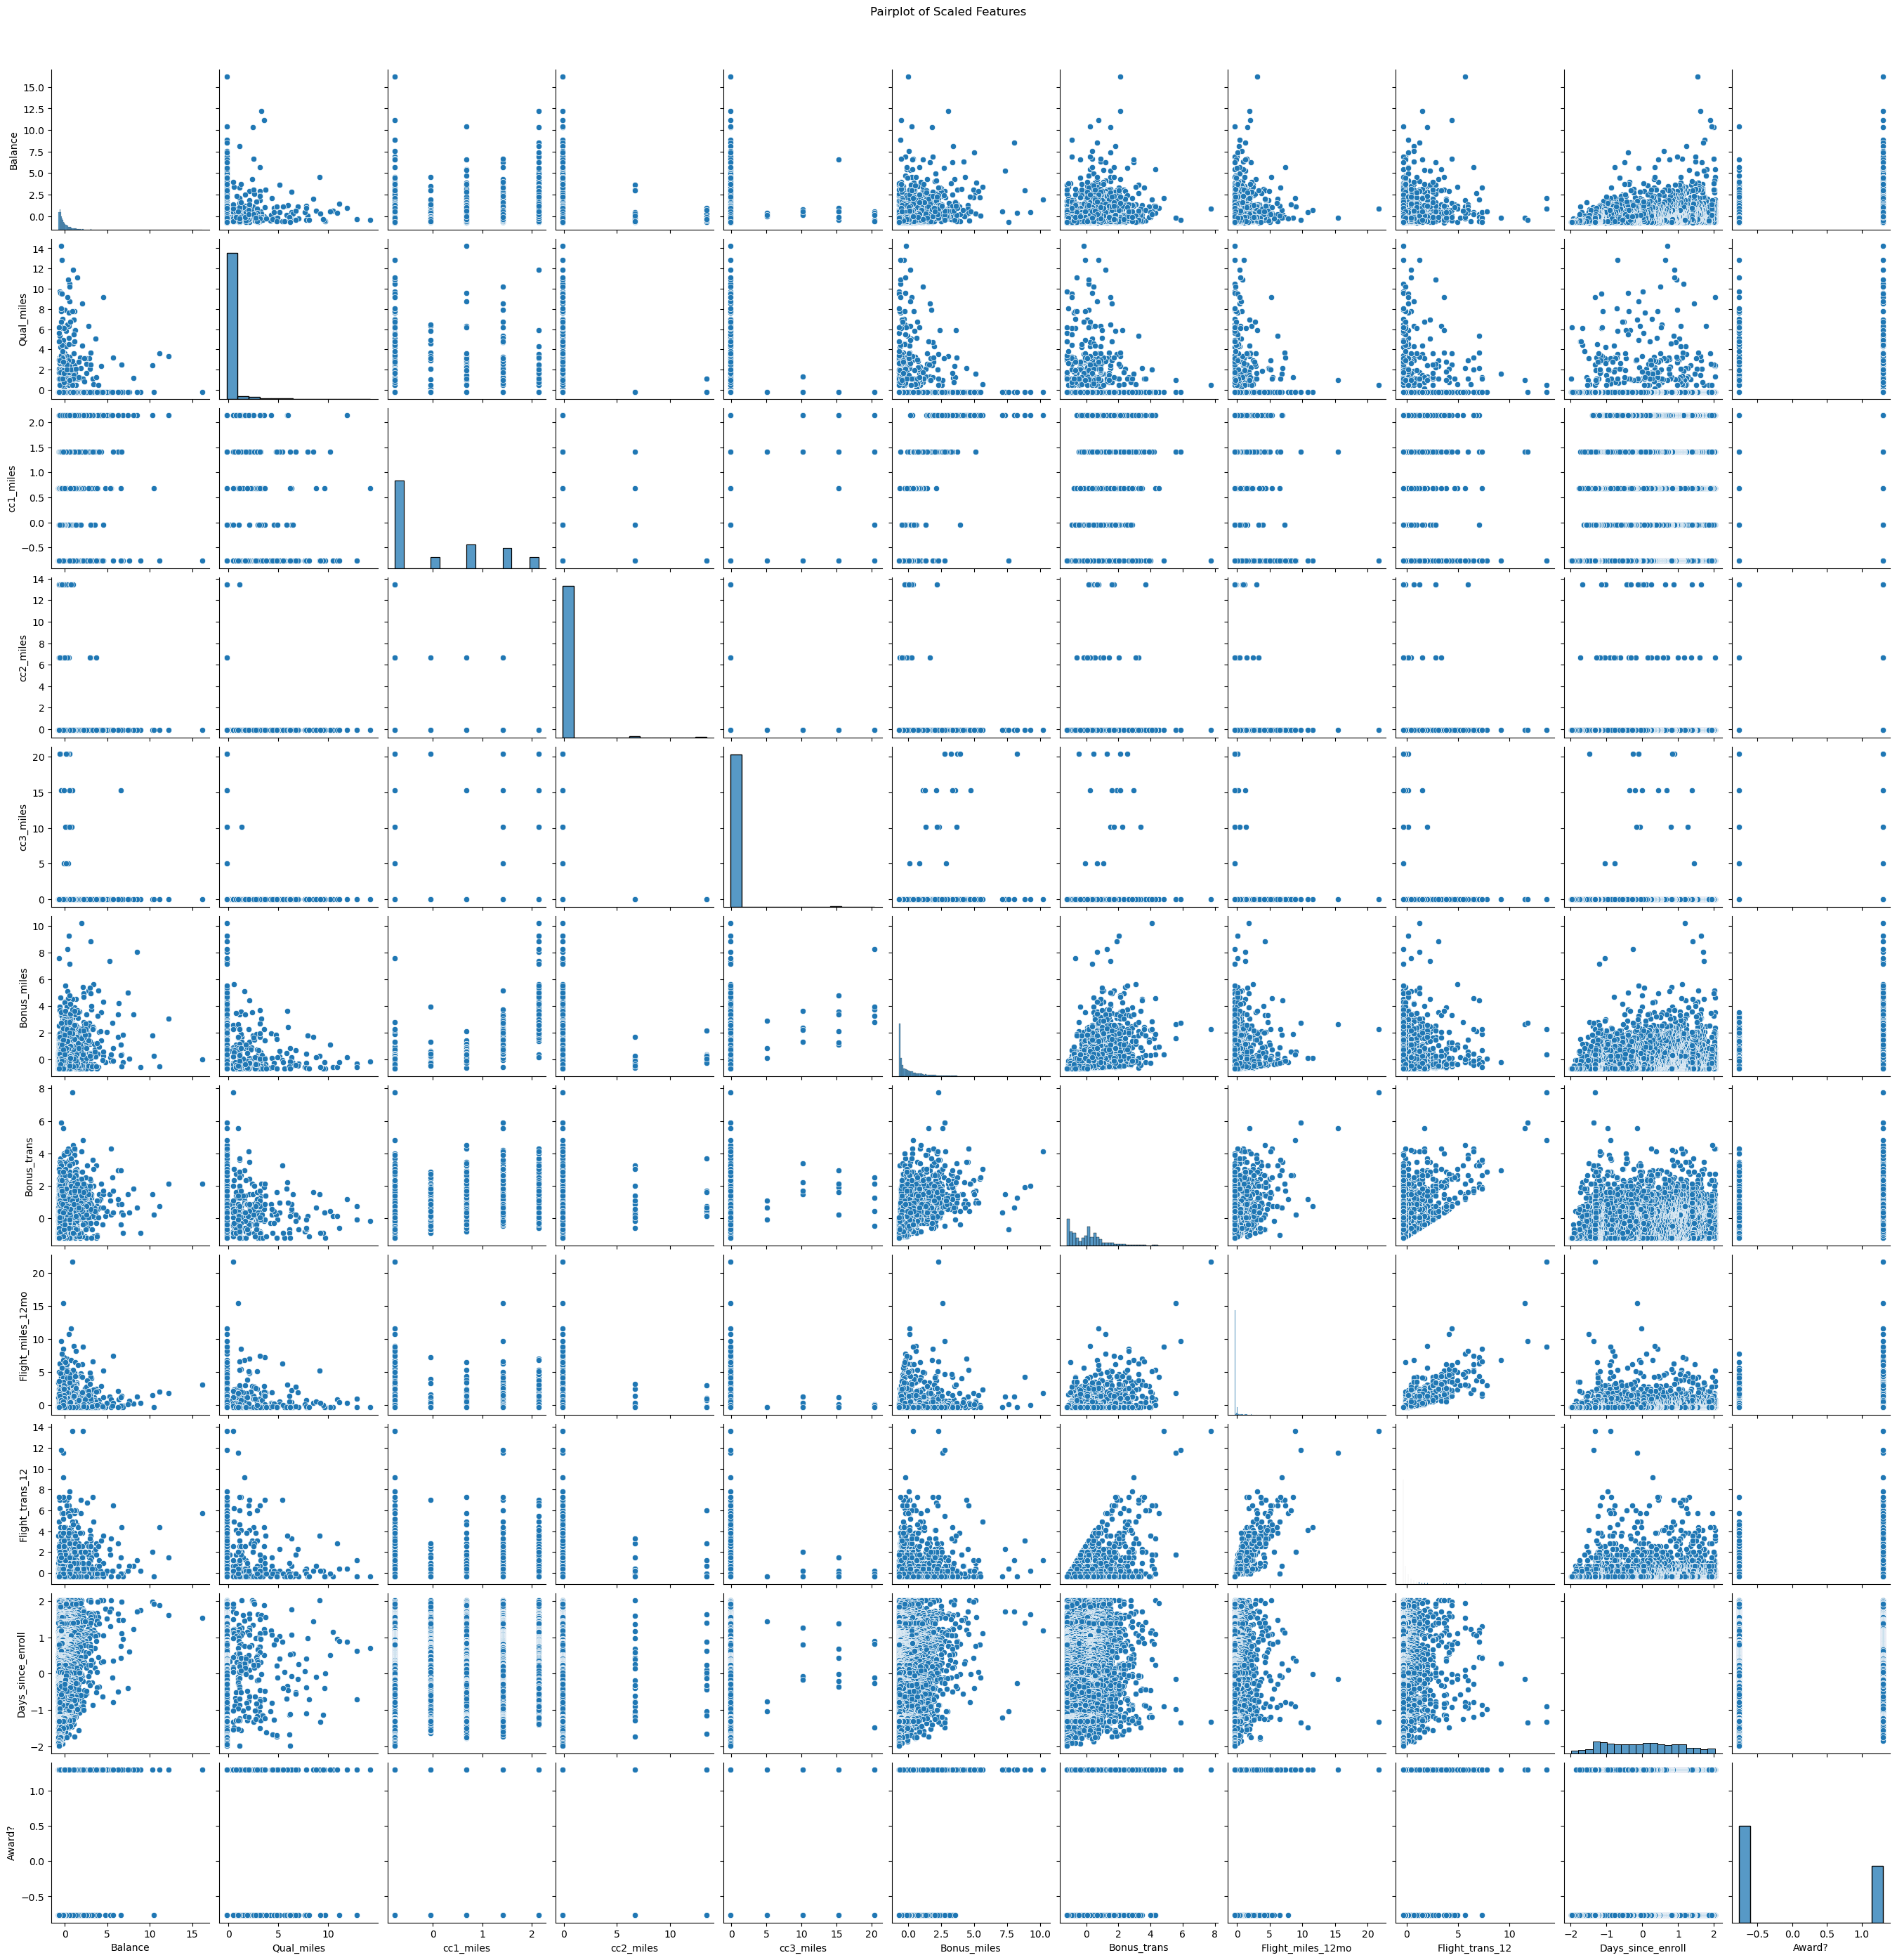

In [30]:
#EDA:Visualizations
sns.pairplot(pd.DataFrame(scaled_data,columns=df.columns))
plt.suptitle("Pairplot of Scaled Features",y=1.02)
plt.show()

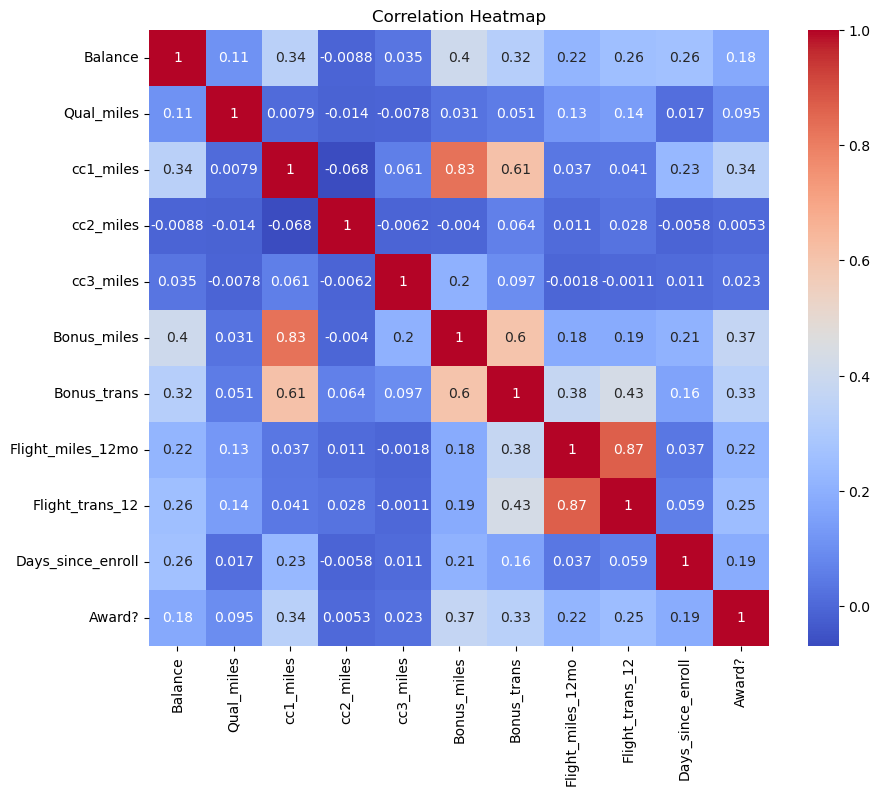

In [31]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(scaled_data,columns=df.columns).corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

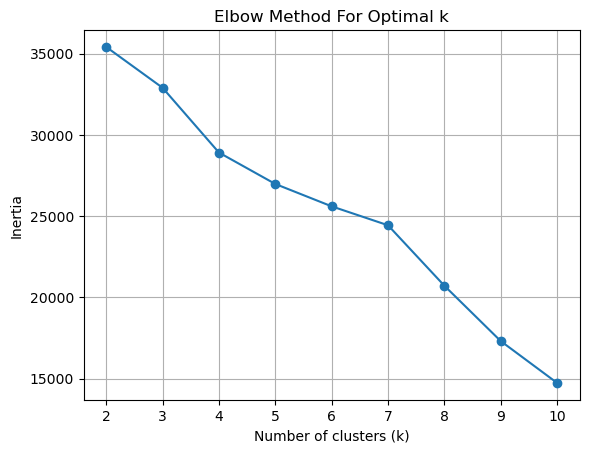

In [34]:
#K-Means Clustering
#Elbow method to find optimal K
inertia=[]
k_range=range(2,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range,inertia,marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [35]:
#Fit KMeans with chosen K 
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans_labels=kmeans.fit_predict(scaled_data)

In [36]:
#Evaluate KMeans
kmeans_score=silhouette_score(scaled_data,kmeans_labels)
print(f"\nK-Means Silhouette Score:{kmeans_score:.4f}")


K-Means Silhouette Score:0.1907


In [37]:
df['KMeans_Cluster']=kmeans_labels

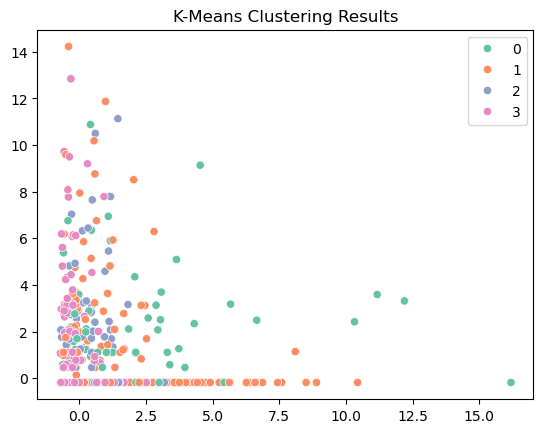

In [38]:
#Plot KMeans clusters
sns.scatterplot(x=scaled_data[:, 0],y=scaled_data[:, 1],hue=kmeans_labels,palette='Set2')
plt.title("K-Means Clustering Results")
plt.show()

In [39]:
#Hierarchical Clustering
linkage_matrix=linkage(scaled_data,method='ward')

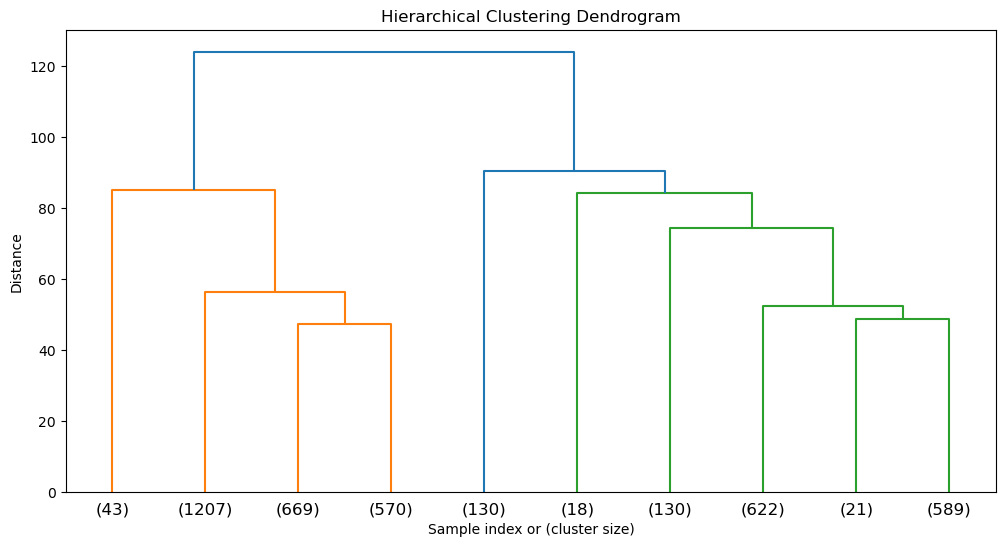

In [40]:
#Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix,truncate_mode='lastp',p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

In [41]:
#Assign clusters
hier_labels=fcluster(linkage_matrix, 4,criterion='maxclust')
df['Hierarchical_Cluster']=hier_labels

In [42]:
#Evaluate
hier_score=silhouette_score(scaled_data,hier_labels)
print(f"Hierarchical Clustering Silhouette Score:{hier_score:.4f}")

Hierarchical Clustering Silhouette Score:0.3081


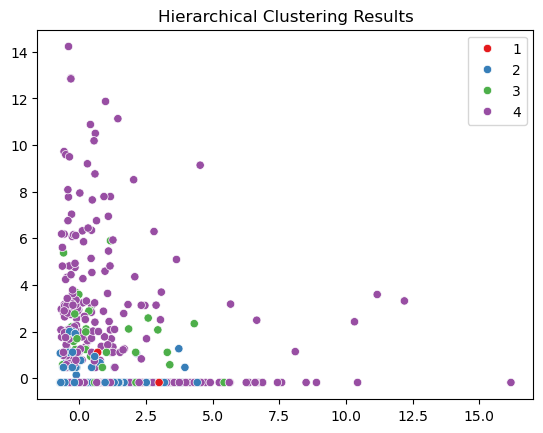

In [43]:
#Plot Hierarchical Clusters
sns.scatterplot(x=scaled_data[:, 0],y=scaled_data[:, 1],hue=hier_labels,palette='Set1')
plt.title("Hierarchical Clustering Results")
plt.show()

In [44]:
#DBSCAN Clustering
dbscan=DBSCAN(eps=1.8,min_samples=6)
dbscan_labels=dbscan.fit_predict(scaled_data)

In [45]:
#Add DBSCAN cluster labels
df['DBSCAN_Cluster']=dbscan_labels

In [46]:
mask=dbscan_labels !=-1
if mask.sum()>1:
    dbscan_score=silhouette_score(scaled_data[mask],dbscan_labels[mask])
    print(f"DBSCAN Silhouette Score (excluding noise):{dbscan_score:.4f}")
else:
    print("Not enough clusters found by DBSCAN to compute silhouette score.")

DBSCAN Silhouette Score (excluding noise):0.2889


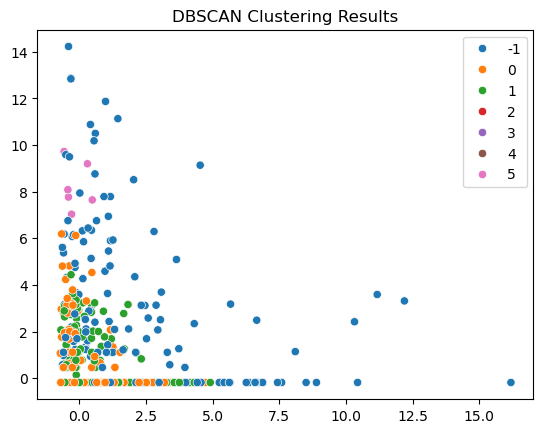

In [47]:
#Plot DBSCAN clusters
sns.scatterplot(x=scaled_data[:, 0],y=scaled_data[:, 1],hue=dbscan_labels,palette='tab10')
plt.title("DBSCAN Clustering Results")
plt.show()

In [48]:
#Cluster Summary
print("\nCluster Counts:")
print(df[['KMeans_Cluster','Hierarchical_Cluster','DBSCAN_Cluster']].value_counts())


Cluster Counts:
KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster
3               2                      0                1229
2               2                      0                 760
1               4                      1                 686
                                       0                 314
2               2                      1                 280
3               2                      1                 155
0               3                     -1                  94
1               4                     -1                  85
2               4                      0                  81
                                       1                  70
3               4                      1                  68
                                       0                  28
0               4                     -1                  22
                3                      0                  13
2               4                     -1                  12
0              